In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')


In [2]:
print(customers.head())
print(products.head())
print(transactions.head())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

In [3]:
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [4]:
# Since Transaction table has 2 Foreign Keys - CustomerID and ProdID, we Join the 3 tables on these foreign keys and drop all duplicates

merged_data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')
merged_data.drop_duplicates(inplace=True)

Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64


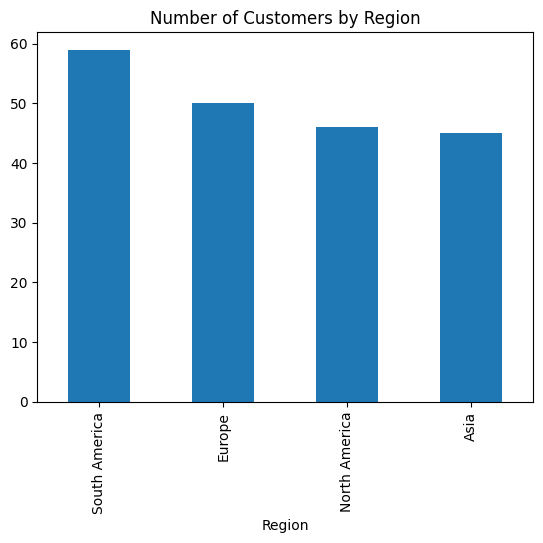

In [5]:
# EDA 1: Categorizing customers by Region - Customr Demographic Analysis
customer_by_region = customers['Region'].value_counts()
print(customer_by_region)
customer_by_region.plot(kind='bar', title='Number of Customers by Region')
plt.show() 

Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64


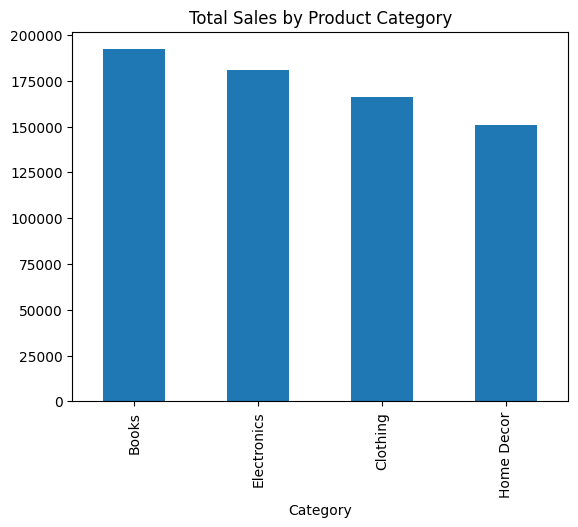

In [6]:
# EDA 2: Categorizing Sales based on Product Category

product_sales = merged_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
print(product_sales)
product_sales.plot(kind='bar', title='Total Sales by Product Category')
plt.show()

TransactionDate
2023-12     3769.52
2024-01    66376.39
2024-02    51459.27
2024-03    47828.73
2024-04    57519.06
2024-05    64527.74
2024-06    48771.18
2024-07    71366.39
2024-08    63436.74
2024-09    70603.75
2024-10    47063.22
2024-11    38224.37
2024-12    59049.20
Freq: M, Name: TotalValue, dtype: float64


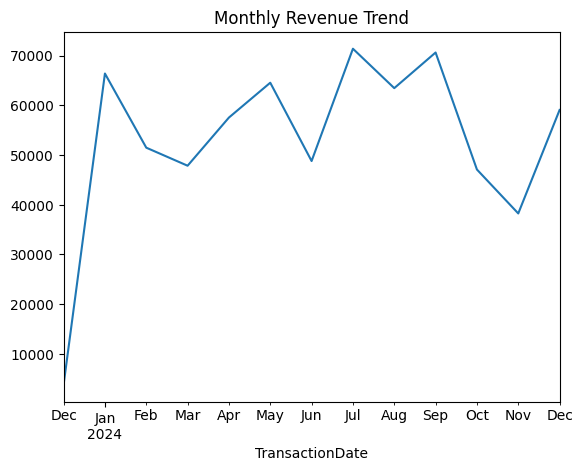

In [7]:
# EDA 3: How the sales grow/reduce every month - Trend Analysis

merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'])
monthly_revenue = merged_data.groupby(merged_data['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()
print(monthly_revenue)
monthly_revenue.plot(kind='line', title='Monthly Revenue Trend')
plt.show()

Top 10 Valuable Customers:
     CustomerID  Recency  Frequency  Monetary  RFM_Score
164      C0165        2          9   6708.10         15
121      C0122       10          7   5072.55         15
3        C0004        4          8   5354.88         15
142      C0143        9          7   6044.63         15
155      C0156       13         11   7634.45         15
98       C0099        4          8   6715.72         15
100      C0101        0          8   5550.99         15
67       C0068        3          8   5950.42         15
27       C0028        3          8   6819.57         15
186      C0188        1          8   7111.32         15


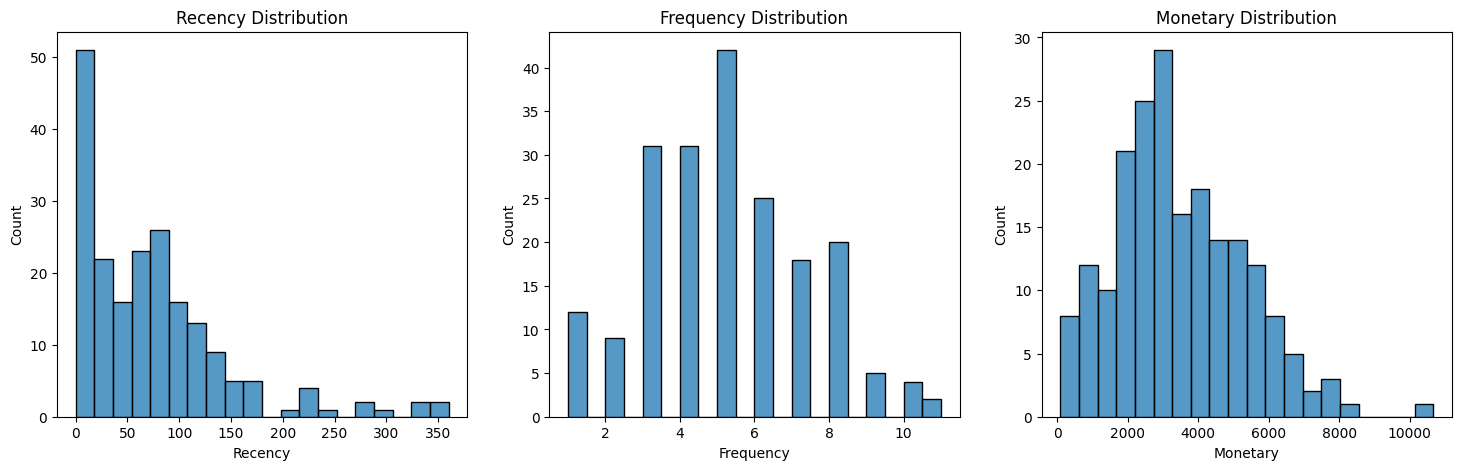

In [17]:
# EDA 4: How frequently a customer is purchasing products - Most Valuable Customers and RFM analysis 

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'])

# Calculate how recently someone purchased
latest_date = merged_data['TransactionDate'].max()
rfm = merged_data.groupby('CustomerID').agg(
    Recency=('TransactionDate', lambda x: (latest_date - x.max()).days),
    Frequency=('TransactionID', 'count'),
    Monetary=('TotalValue', 'sum')
).reset_index()

#RFM scores (1-5 scale) .. for R score lower the better, for M and F higher the better
rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5])
rfm['RFM_Score'] = rfm[['R_Score', 'F_Score', 'M_Score']].sum(axis=1)

# Identify Top Valuable Customers (Highest RFM Score)
top_customers = rfm.sort_values(by='RFM_Score', ascending=False).head(10)
print("Top 10 Valuable Customers:\n", top_customers[['CustomerID', 'Recency', 'Frequency', 'Monetary', 'RFM_Score']])


fig, ax = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(rfm['Recency'], bins=20, ax=ax[0])
ax[0].set_title('Recency Distribution')

sns.histplot(rfm['Frequency'], bins=20, ax=ax[1])
ax[1].set_title('Frequency Distribution')

sns.histplot(rfm['Monetary'], bins=20, ax=ax[2])
ax[2].set_title('Monetary Distribution')

plt.show()



In [10]:
pip install mlxtend

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.4 MB 495.5 kB/s eta 0:00:03
   ------ --------------------------------- 0.2/1.4 MB 2.1 MB/s eta 0:00:01
   ---------------- ----------------------- 0.6/1.4 MB 3.5 MB/s eta 0:00:01
   -------------------------- ------------- 0.9/1.4 MB 4.4 MB/s eta 0:00:01
   ------------------------------------ --- 1.2/1.4 MB 4.8 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 4.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Total Revenue Generated: $689,995.56
Top 10% Customers Revenue Contribution: $131,829.22 (19.11%)

 Top 5% High-Value Customers:
    CustomerID  TotalValue  CumulativeRevenue  RevenuePercentage
140      C0141    10673.87           10673.87           0.015469
53       C0054     8040.39           18714.26           0.027122
64       C0065     7663.70           26377.96           0.038229
155      C0156     7634.45           34012.41           0.049294
81       C0082     7572.91           41585.32           0.060269
186      C0188     7111.32           48696.64           0.070575
58       C0059     7073.28           55769.92           0.080826
27       C0028     6819.57           62589.49           0.090710
98       C0099     6715.72           69305.21           0.100443


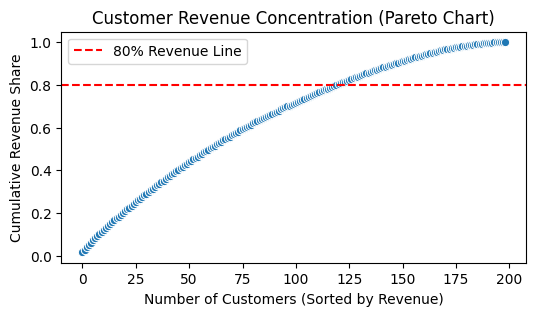

In [ ]:
# EDA 5: Revenue contribution by customer segments

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

customer_revenue = merged_data.groupby('CustomerID')['TotalValue'].sum().reset_index()
customer_revenue = customer_revenue.sort_values(by='TotalValue', ascending=False)

# cumulative revenue and percentage contribution
customer_revenue['CumulativeRevenue'] = customer_revenue['TotalValue'].cumsum()
customer_revenue['RevenuePercentage'] = customer_revenue['CumulativeRevenue'] / customer_revenue['TotalValue'].sum()

# top revenue-generating customers
top_10_percent_cutoff = int(0.10 * len(customer_revenue))  # Top 10% customers
top_10_percent_revenue = customer_revenue.iloc[:top_10_percent_cutoff]['TotalValue'].sum()
total_revenue = customer_revenue['TotalValue'].sum()

print("Total Revenue Generated: ${:,.2f}".format(total_revenue))
print("Top 10% Customers Revenue Contribution: ${:,.2f} ({:.2f}%)".format(
    top_10_percent_revenue, (top_10_percent_revenue / total_revenue) * 100))


high_value_cutoff = int(0.05 * len(customer_revenue))  # Top 5% customers
high_value_customers = customer_revenue.iloc[:high_value_cutoff]

print("\n Top 5% High-Value Customers:")
print(high_value_customers)

# Pareto Chart (80/20 Rule Visualization)
plt.figure(figsize=(6, 3))
sns.lineplot(x=range(len(customer_revenue)), y=customer_revenue['RevenuePercentage'], marker='o')
plt.axhline(y=0.8, color='r', linestyle='--', label="80% Revenue Line")
plt.title('Customer Revenue Concentration (Pareto Chart)')
plt.xlabel('Number of Customers (Sorted by Revenue)')
plt.ylabel('Cumulative Revenue Share')
plt.legend()
plt.show()


